In [84]:
# Import common libraries used in Data Analysis
import numpy as np # for array operations
import pandas as pd # for dataframe manipulation 
import matplotlib.pyplot as plt # together with Seaborn to visualize data
import seaborn as sns
import warnings; warnings.filterwarnings("ignore") # to ignore warnings caused of incoming library deprecations

In [85]:
data = pd.read_csv("bread basket.csv")
print("DataFrame shape:", data.shape)
data.head() # Data for the first 5 rows

DataFrame shape: (20507, 5)


,Transaction,Item,date_time,period_day,weekday_weekend
0,1,Bread,30-10-2016 09:58,morning,weekend
1,2,Scandinavian,30-10-2016 10:05,morning,weekend
2,2,Scandinavian,30-10-2016 10:05,morning,weekend
3,3,Hot chocolate,30-10-2016 10:07,morning,weekend
4,3,Jam,30-10-2016 10:07,morning,weekend


In [86]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20507 entries, 0 to 20506
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Transaction      20507 non-null  int64 
 1   Item             20507 non-null  object
 2   date_time        20507 non-null  object
 3   period_day       20507 non-null  object
 4   weekday_weekend  20507 non-null  object
dtypes: int64(1), object(4)
memory usage: 801.2+ KB


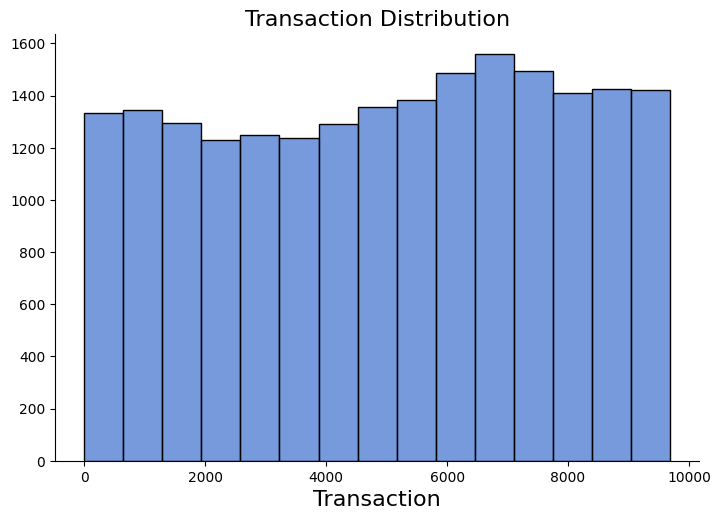

In [87]:
sns.displot(data = data, bins = 15, x = "Transaction", height = 5, aspect = 1.5)
plt.title("Transaction Distribution", size = 16)
plt.xlabel("Transaction", size = 16); plt.ylabel("") 
plt.show()

In [88]:
# We use Pandas' method to_datetime(), and match the time formatting on what the date_time column is storing

data['date_time'] = pd.to_datetime(data['date_time'], format = "%d-%m-%Y %H:%M")

In [89]:
data["date_time"].dtype

dtype('<M8[ns]')

In [90]:
data["month"] = data['date_time'].dt.month
data["day"] = data['date_time'].dt.weekday
data["hour"] = data['date_time'].dt.hour

In [91]:
# final result
data.head()

,Transaction,Item,date_time,period_day,weekday_weekend,month,day,hour
0,1,Bread,2016-10-30 09:58:00,morning,weekend,10,6,9
1,2,Scandinavian,2016-10-30 10:05:00,morning,weekend,10,6,10
2,2,Scandinavian,2016-10-30 10:05:00,morning,weekend,10,6,10
3,3,Hot chocolate,2016-10-30 10:07:00,morning,weekend,10,6,10
4,3,Jam,2016-10-30 10:07:00,morning,weekend,10,6,10


Top 10 most purchased items

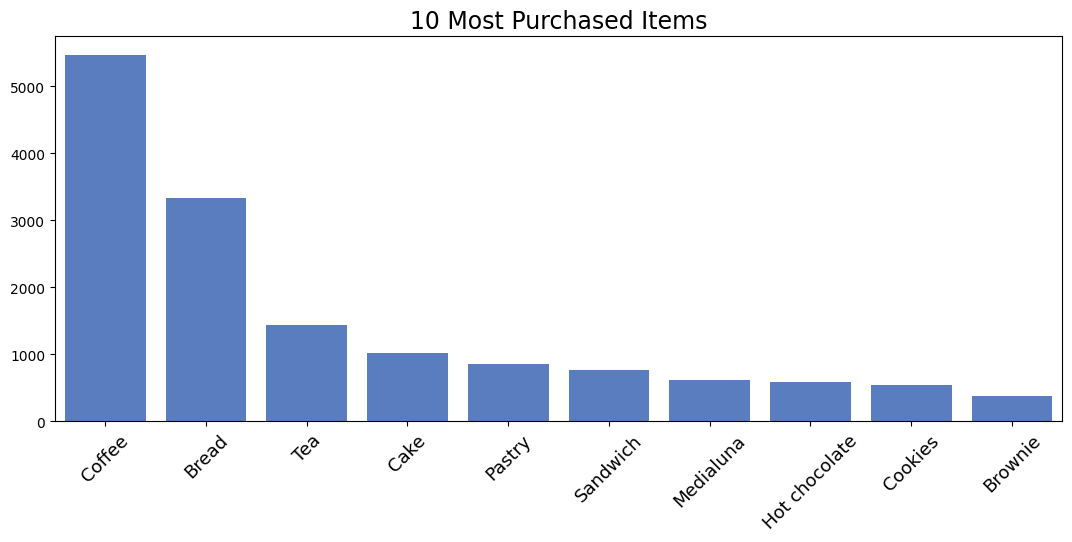

In [92]:
plt.figure(figsize=(13,5))
sns.set_palette("muted")

sns.barplot(x = data["Item"].value_counts()[:10].index, y = data["Item"].value_counts()[:10].values)
plt.xlabel(""); plt.ylabel("")
plt.xticks(size = 13, rotation = 45)
plt.title('10 Most Purchased Items', size = 17)
plt.show()

Transactions every month

Text(0.5, 1.0, 'Total Transactions Every Month (October - April)')

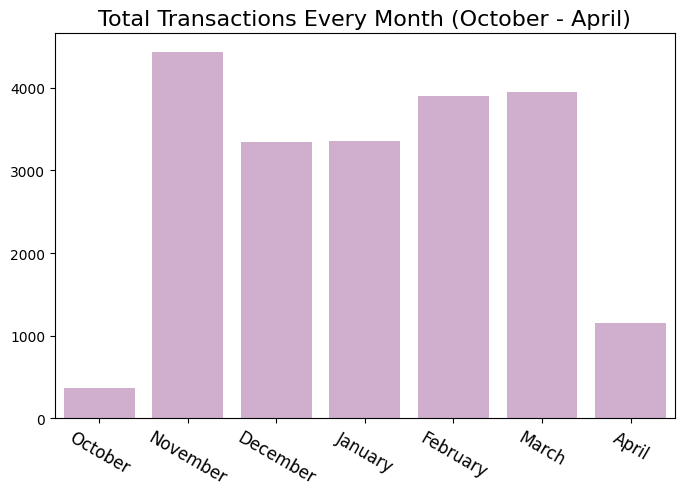

In [93]:
data_perbulan = data.groupby('month')['Transaction'].count()
data_perbulan = pd.concat([data_perbulan.iloc[4:], data_perbulan.iloc[:4]])

plt.figure(figsize = (8,5))
sns.barplot(
    x = ["October", "November", "December", "January", "February", "March", "April"], 
    y = data_perbulan.values, color = "#D5AAD3")
plt.xticks(size = 12, rotation = -30)
plt.title("Total Transactions Every Month (October - April)", size = 16)

Total Transactions Each Day

Text(0.5, 1.0, 'Total Transactions Each Day')

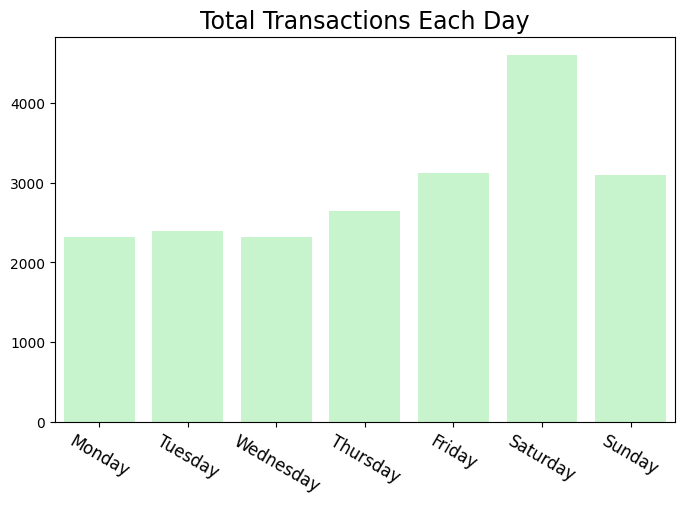

In [94]:
data_perday = data.groupby('day')['Transaction'].count()

plt.figure(figsize = (8,5))
sns.barplot(
    x = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"], 
    y = data_perday.values, color = "#BFFCC6")
plt.xticks(size = 12, rotation = -30)
plt.title("Total Transactions Each Day", size = 17)

Looking at orders every hour

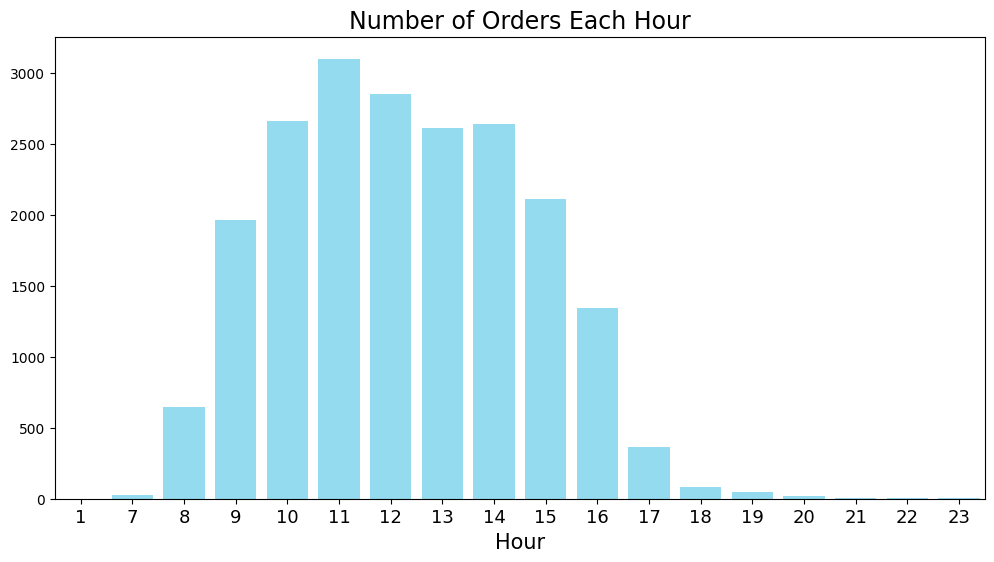

In [95]:
data_perhour = data.groupby("hour")["Transaction"].count()

plt.figure(figsize=(12,6))
sns.barplot(x = data_perhour.index, y = data_perhour.values, color = "#85E3FF")
plt.xlabel('Hour', size = 15)
plt.title('Number of Orders Each Hour', size = 17)
plt.xticks(size = 13)
plt.show()

Looking at the most 10 popular items every period of day

In [96]:
data_period_day = data.groupby(['period_day','Item'])['Transaction'].count().reset_index().sort_values(['period_day','Transaction'],ascending=False)
days = ['Morning', 'Afternoon', 'Evening', 'Night']

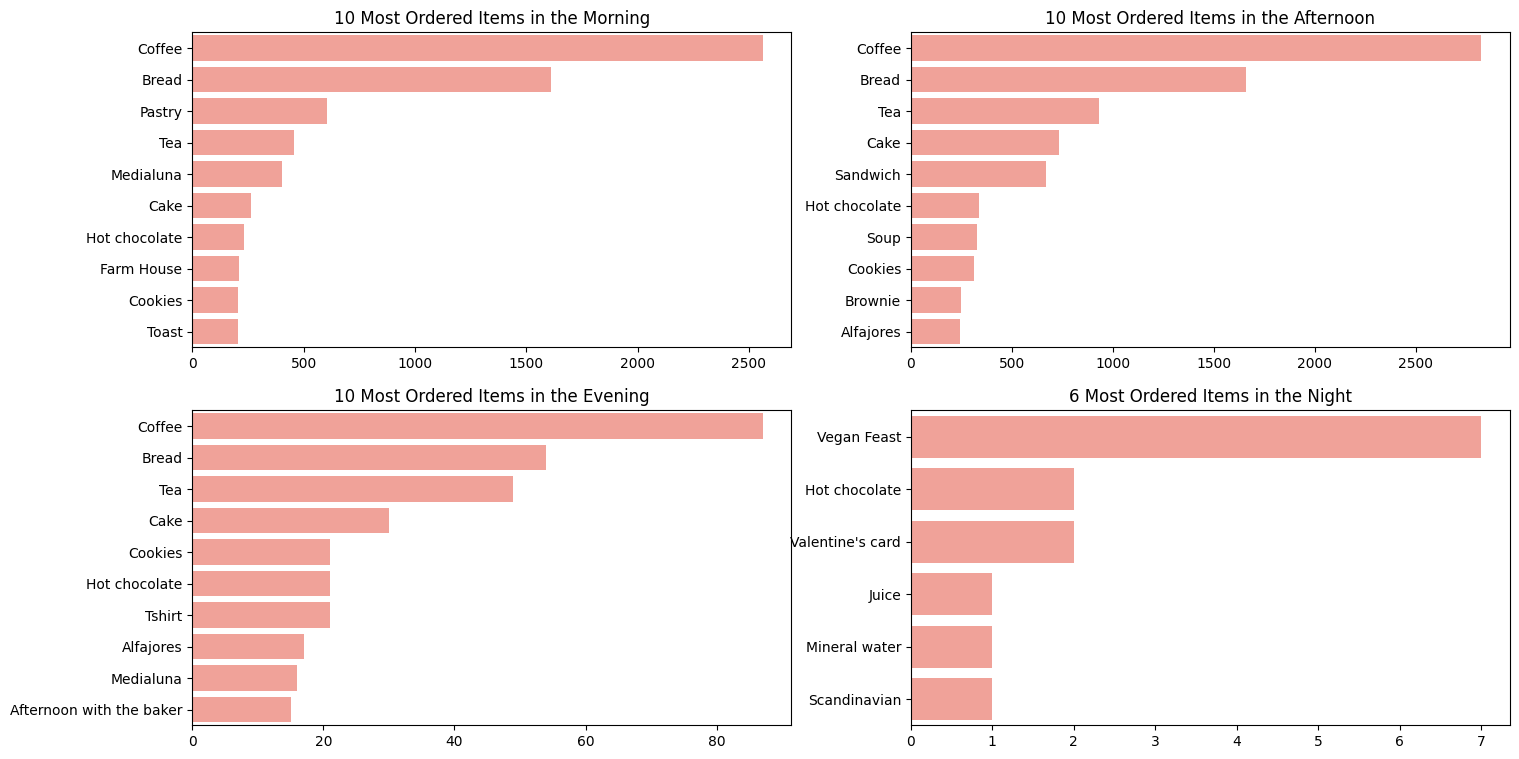

In [97]:
fig, ax = plt.subplots(ncols = 2, nrows = 2, figsize = (17,9))

index = 0
for i in range(len(ax)):
    for j in range(len(ax[0])):
        data_temp = data_period_day[data_period_day["period_day"] == days[index].lower()].head(10)
        sns.barplot(x = data_temp["Transaction"], y = data_temp["Item"], ax = ax[i,j], color = "#FF968A")
        ax[i,j].set_xlabel(""); ax[i,j].set_ylabel("")
        if index != 3:
            ax[i,j].set_title(f"10 Most Ordered Items in the {days[index]}")
        else:
            ax[i,j].set_title(f"6 Most Ordered Items in the {days[index]}")
        index += 1
plt.show()

## Data Preparation

In [98]:
# Apply lower() function with Pandas' apply method
data["Item"] = data["Item"].apply(lambda item: item.lower())

In [99]:
# Stripping out the whitespaces from "Item" column
data["Item"] = data["Item"].apply(lambda item: item.strip())

In [100]:
data = data[["Transaction", "Item"]].copy()
data.head(10)

,Transaction,Item
0,1,bread
1,2,scandinavian
2,2,scandinavian
3,3,hot chocolate
4,3,jam
5,3,cookies
6,4,muffin
7,5,coffee
8,5,pastry
9,5,bread


In [101]:
# Import mlxtend (Machine Learning Extensions) library, that provides addition Machine Learning functions out of Scikit Learn

from mlxtend.frequent_patterns import association_rules, apriori

In [102]:
item_count = data.groupby(["Transaction", "Item"])["Item"].count().reset_index(name = "Count")
item_count.head(10)

,Transaction,Item,Count
0,1,bread,1
1,2,scandinavian,2
2,3,cookies,1
3,3,hot chocolate,1
4,3,jam,1
5,4,muffin,1
6,5,bread,1
7,5,coffee,1
8,5,pastry,1
9,6,medialuna,1


In [103]:
item_count_pivot = item_count.pivot_table(index='Transaction', columns='Item', values='Count', aggfunc='sum').fillna(0)
print("Ukuran dataset:", item_count_pivot.shape)
item_count_pivot.head()

Ukuran dataset: (9465, 94)


Item,adjustment,afternoon with the baker,alfajores,argentina night,art tray,bacon,baguette,bakewell,bare popcorn,basket,...,the bart,the nomad,tiffin,toast,truffles,tshirt,valentine's card,vegan feast,vegan mincepie,victorian sponge
Transaction,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [104]:
# cast the data type as integer

item_count_pivot = item_count_pivot.astype("int32")
item_count_pivot.head()

Item,adjustment,afternoon with the baker,alfajores,argentina night,art tray,bacon,baguette,bakewell,bare popcorn,basket,...,the bart,the nomad,tiffin,toast,truffles,tshirt,valentine's card,vegan feast,vegan mincepie,victorian sponge
Transaction,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [105]:
def encode(x):
    """This function encode the value in from the table. If an item is bought, it returns 1, else returns 0."""
    if x <= 0:
        return 0
    elif x >= 1:
        return 1
    
item_count_pivot = item_count_pivot.applymap(encode)
item_count_pivot.head()

Item,adjustment,afternoon with the baker,alfajores,argentina night,art tray,bacon,baguette,bakewell,bare popcorn,basket,...,the bart,the nomad,tiffin,toast,truffles,tshirt,valentine's card,vegan feast,vegan mincepie,victorian sponge
Transaction,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [106]:
# Final summary:

print("dataset:", item_count_pivot.shape)
print("transaction:", item_count_pivot.shape[0])
print("items:", item_count_pivot.shape[1])

dataset: (9465, 94)
transaction: 9465
items: 94


In [107]:
support = 0.005 # atau 1%
frequent_items = apriori(item_count_pivot, min_support = support, use_colnames = True)
frequent_items.sort_values("support", ascending = False).head(10)

,support,itemsets
7,0.478394,(coffee)
3,0.327205,(bread)
31,0.142631,(tea)
5,0.103856,(cake)
42,0.090016,"(bread, coffee)"
23,0.086107,(pastry)
25,0.071844,(sandwich)
20,0.061807,(medialuna)
15,0.058320,(hot chocolate)
58,0.054728,"(coffee, cake)"


In [108]:
metric = "lift"
min_threshold = 1.3

rules = association_rules(frequent_items, metric = metric, min_threshold = min_threshold)[["antecedents", "consequents", "support", "confidence", "lift"]]
rules.sort_values('confidence', ascending = False, inplace = True)
rules

,antecedents,consequents,support,confidence,lift
9,(keeping it local),(coffee),0.005388,0.809524,1.692169
12,(toast),(coffee),0.023666,0.704403,1.472431
11,(salad),(coffee),0.006550,0.626263,1.309094
15,(coke),(sandwich),0.005177,0.266304,3.706722
33,(soup),(tea),0.009086,0.263804,1.849557
31,(scone),(tea),0.008347,0.241590,1.693816
38,"(hot chocolate, coffee)",(cake),0.006867,0.232143,2.235231
7,(cake),(tea),0.023772,0.228891,1.604781
42,"(tea, coffee)",(cake),0.010037,0.201271,1.937977
29,(sandwich),(tea),0.014369,0.200000,1.402222


In [109]:
# take the "antecedents" and "consequents" values

antecedents = list(rules["antecedents"].apply(lambda x: list(x))) # convert them to list with lambda function in Pandas.apply()
consequents = list(rules["consequents"].apply(lambda x: list(x)))

In [110]:
# see 10 of the antecedents item
antecedents

[['keeping it local'],
 ['toast'],
 ['salad'],
 ['coke'],
 ['soup'],
 ['scone'],
 ['hot chocolate', 'coffee'],
 ['cake'],
 ['tea', 'coffee'],
 ['sandwich'],
 ['hot chocolate'],
 ['toast'],
 ['juice'],
 ['alfajores'],
 ['juice'],
 ['tea'],
 ['soup'],
 ['juice'],
 ['juice'],
 ['medialuna'],
 ['pastry'],
 ['coffee', 'cake'],
 ['bread', 'coffee'],
 ['hot chocolate'],
 ['cookies'],
 ['cookies'],
 ['cake'],
 ['tea', 'coffee'],
 ['pastry'],
 ['hot chocolate'],
 ['tea'],
 ['cake'],
 ['sandwich'],
 ['sandwich'],
 ['sandwich'],
 ['sandwich'],
 ['cake'],
 ['cake'],
 ['tea'],
 ['tea'],
 ['tea'],
 ['coffee'],
 ['tea'],
 ['tea'],
 ['coffee'],
 ['coffee']]

In [111]:
ant_list = [] # to store every single item from antecendents
cons_list = [] # to store every single item from consequents

for outer_ant, outer_cons in zip(antecedents, consequents):
    if (len(outer_ant) > 1) or (len(outer_cons) > 1): # to break again the nested list (e.g., [tea, coffee] )
        for ant in outer_ant :
            for cons in outer_cons:
                ant_list.append(ant)
                cons_list.append(cons)
    else:
        # else it means they are just list of length 1, so we just take the first element (i.e., 0th index) 
        ant_list.append(outer_ant[0])
        cons_list.append(outer_cons[0])

In [112]:
related_items = []
for a, b in zip(ant_list, cons_list):
    related_items.append(f"{a}-{b}")
    
# see the first 5 results:
related_items[:5]

['keeping it local-coffee',
 'toast-coffee',
 'salad-coffee',
 'coke-sandwich',
 'soup-tea']

In [113]:
# convert them into Pandas DataFrame:
related_items_count = pd.DataFrame({
    "items": related_items,
    "count": np.ones(len(related_items), dtype="int32") # since they are all separated, we intialize a value of 1 
})

related_items_count.head(10)

,items,count
0,keeping it local-coffee,1
1,toast-coffee,1
2,salad-coffee,1
3,coke-sandwich,1
4,soup-tea,1
5,scone-tea,1
6,hot chocolate-cake,1
7,coffee-cake,1
8,cake-tea,1
9,tea-cake,1


In [114]:
# grouping by "items", to uniquely store all the related/associated items
items_count_grouped = related_items_count.groupby("items").count().reset_index()
print(items_count_grouped.shape) # notice how the length decreased from 50 to 38, meaning that there are duplicates, that's why we want to count them to see how strong does that event happen

items_count_grouped.head()

(46, 2)


,items,count
0,alfajores-tea,1
1,bread-pastry,1
2,cake-coffee,2
3,cake-hot chocolate,3
4,cake-juice,1


In [115]:
unique_items = []
frequency = []

for i in range(len(items_count_grouped["items"])): # iterate through items
    for j in range(len(items_count_grouped[i + 1:])): # iterate from the next item and so on ...
        
        # take the i-th item
        item_now = items_count_grouped["items"][i].split("-")
        
        # take the j-th item (relative to the i-th. so when i equals 10, j equals 11)
        item_temp = items_count_grouped["items"][j + i + 1].split("-")
        
        # check if they are the same
        if len(set(item_now + item_temp)) == 2:
            # example: ["cake", "bread"] and ["bread", "cake"] melted together in the set() as ["cake", "bread"], that's why we only have to check if the length is 2
            
            # add the related-items' name, and the frequency
            unique_items.append(item_now)
            frequency.append(items_count_grouped["count"][i] + items_count_grouped["count"][j])
            
            # proceed to the next i-th item, since there are only 2 possibilities (a-b & b-a), no more further check
            break
            
            
# see the first 5 results:
for a, b in zip(unique_items[:5], frequency[:5]):
    print(a, "=> count:", b)

['alfajores', 'tea'] => count: 2
['bread', 'pastry'] => count: 2
['cake', 'coffee'] => count: 5
['cake', 'hot chocolate'] => count: 4
['cake', 'juice'] => count: 2


In [116]:
# store it as a Pandas DataFrame
chord_data = pd.DataFrame({
    "A": [i[0] for i in unique_items],
    "B": [i[1] for i in unique_items],
    "weight": [i * 1 for i in frequency]
})

chord_data

,A,B,weight
0,alfajores,tea,2
1,bread,pastry,2
2,cake,coffee,5
3,cake,hot chocolate,4
4,cake,juice,2
5,cake,tea,3
6,coffee,hot chocolate,2
7,coffee,keeping it local,2
8,coffee,pastry,4
9,coffee,salad,2


In [117]:
# save the final Chord Diagram dataset as CSV
chord_data.to_csv("chord_diagrammm.csv", index = False)

In [118]:
# double check the saved CSV
pd.read_csv("chord_diagrammm.csv")

,A,B,weight
0,alfajores,tea,2
1,bread,pastry,2
2,cake,coffee,5
3,cake,hot chocolate,4
4,cake,juice,2
5,cake,tea,3
6,coffee,hot chocolate,2
7,coffee,keeping it local,2
8,coffee,pastry,4
9,coffee,salad,2
